# Sleep, Health and Lifestyle

## Introduction

What is creating stress? How you can you reduce it?
The objective of this project is to find out which health indications and sleep habits affect your stress level.

For the project we make use of a data-set, which shows data of 100.000 individuals. Each individual is represented by one line in the data-set. The following 13 variables are recorded:

**TODO Describe all the variables in the data-set**

## Basic Data Exploration (EDA)

To gain an initial understanding of the dataset, we begin by importing the necessary libraries, checking the dataset’s shape, and generating summary statistics to explore its structure.

In [263]:
# Import libraries
import pandas as pd

# Libraries for Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [265]:
# Load dataset
sleep_df = pd.read_csv("../New_Raw_synthetic_Datasets/sleep_health_lifestyle_synthetic.csv")
# Check the shape of the data frame
print(sleep_df.shape)
# Show the head of the data frame
sleep_df.head()

(100000, 15)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,1,Male,39,Construction Worker,7.4,3,53,7,Obese,146/97,92,5705,NaN,146,97
1,2,Female,27,Sales Representative,6.5,4,32,7,Normal,126/85,84,14442,NaN,126,85
2,3,Female,42,Software Engineer,5.4,7,77,8,Obese,139/97,59,7305,NaN,139,97
3,4,Female,50,Software Engineer,7.9,5,43,10,Normal,128/81,88,10700,Insomnia,128,81
4,5,Female,51,Doctor,8.0,7,38,9,Underweight,115/76,96,9193,NaN,115,76


In [267]:
# Show a basic description about the values stored in all the columns
sleep_df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic BP,Diastolic BP
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,43.951570,6.494987,5.485010,50.021990,5.471430,77.452720,8514.697930,127.436200,83.103260
std,28867.657797,15.285862,1.445128,2.870742,23.366954,2.875098,13.293491,3752.485636,10.634363,7.402732
min,1.000000,18.000000,4.000000,1.000000,10.000000,1.000000,55.000000,2000.000000,110.000000,70.000000
25%,25000.750000,31.000000,5.200000,3.000000,30.000000,3.000000,66.000000,5279.000000,118.000000,77.000000
50%,50000.500000,44.000000,6.500000,5.000000,50.000000,5.000000,77.000000,8522.000000,127.000000,82.000000
75%,75000.250000,57.000000,7.700000,8.000000,70.000000,8.000000,89.000000,11767.000000,136.000000,88.000000
max,100000.000000,70.000000,9.000000,10.000000,90.000000,10.000000,100.000000,15000.000000,150.000000,100.000000


## Basic Data Cleaning

#### a. Missing values and Dropping columns

In [271]:
# Sleep Data
# Dropping irrelevant columns from sleep dataset
sleep_df = sleep_df.drop(['Person ID','Occupation', 'Blood Pressure'], axis=1)
# Maybe the Occuption is still relevant for the stress level? If yes, only drop the person id.
# sleep_df_updated = sleep_df.drop(['Person ID'], axis=1)

In [273]:
# To check if the columns are dropped 
sleep_df.columns
sleep_df.shape

(100000, 12)

In [275]:
# Check for missing (NaN) values in the entire DataFrame
print(sleep_df.isna().sum())  # Returns the count of NaN values for each column

Gender                         0
Age                            0
Sleep Duration                 0
Quality of Sleep               0
Physical Activity Level        0
Stress Level                   0
BMI Category                   0
Heart Rate                     0
Daily Steps                    0
Sleep Disorder             75004
Systolic BP                    0
Diastolic BP                   0
dtype: int64


In [277]:
# We see that aboout 75 % of the data have no value for "Sleep Disorder".
# One option would be to drop the rows with any NaN values
# sleep_df_updated = sleep_df.dropna()

# However, since this affects a lot of data, we would potentially loose some information, 
# so for the moment we replace the NaN values with 'No Sleep Disorder'
sleep_df = sleep_df.fillna('No Sleep Disorder')

In [279]:
# Check for missing (NaN) values in the entire DataFrame
print(sleep_df.isna().sum())

Gender                     0
Age                        0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
Systolic BP                0
Diastolic BP               0
dtype: int64


In [291]:
# Check for data types
print("\nSleep Dataset Info:")
print(sleep_df.info())
sleep_df.shape


Sleep Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Gender                   100000 non-null  object 
 1   Age                      100000 non-null  int64  
 2   Sleep Duration           100000 non-null  float64
 3   Quality of Sleep         100000 non-null  int64  
 4   Physical Activity Level  100000 non-null  int64  
 5   Stress Level             100000 non-null  int64  
 6   BMI Category             100000 non-null  object 
 7   Heart Rate               100000 non-null  int64  
 8   Daily Steps              100000 non-null  int64  
 9   Sleep Disorder           100000 non-null  object 
 10  Systolic BP              100000 non-null  int64  
 11  Diastolic BP             100000 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 9.2+ MB
None


(100000, 12)

In [331]:
# Check for distinct values in the str data columns
print(sleep_df['Gender'].unique())
print(sleep_df['BMI Category'].unique())
print(sleep_df['Sleep Disorder'].unique())

['Male' 'Female']
['Obese' 'Normal' 'Underweight' 'Overweight']
['No Sleep Disorder' 'Insomnia']


In [333]:
# Seperation of Blood Presure not necessary anymore
# sleep_df_updated2 = pd.concat([sleep_df_updated, sleep_df_updated['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)

## Basic Data Visualization and further Data Exploration

In this phase, we first conduct a comprehensive analysis of each variable to understand the distribution of values and identify any underlying patterns within the dataset. This step enables us to gain insights into the data structure and detect potential anomalies ensuring a well-informed approach for subsequent analysis.

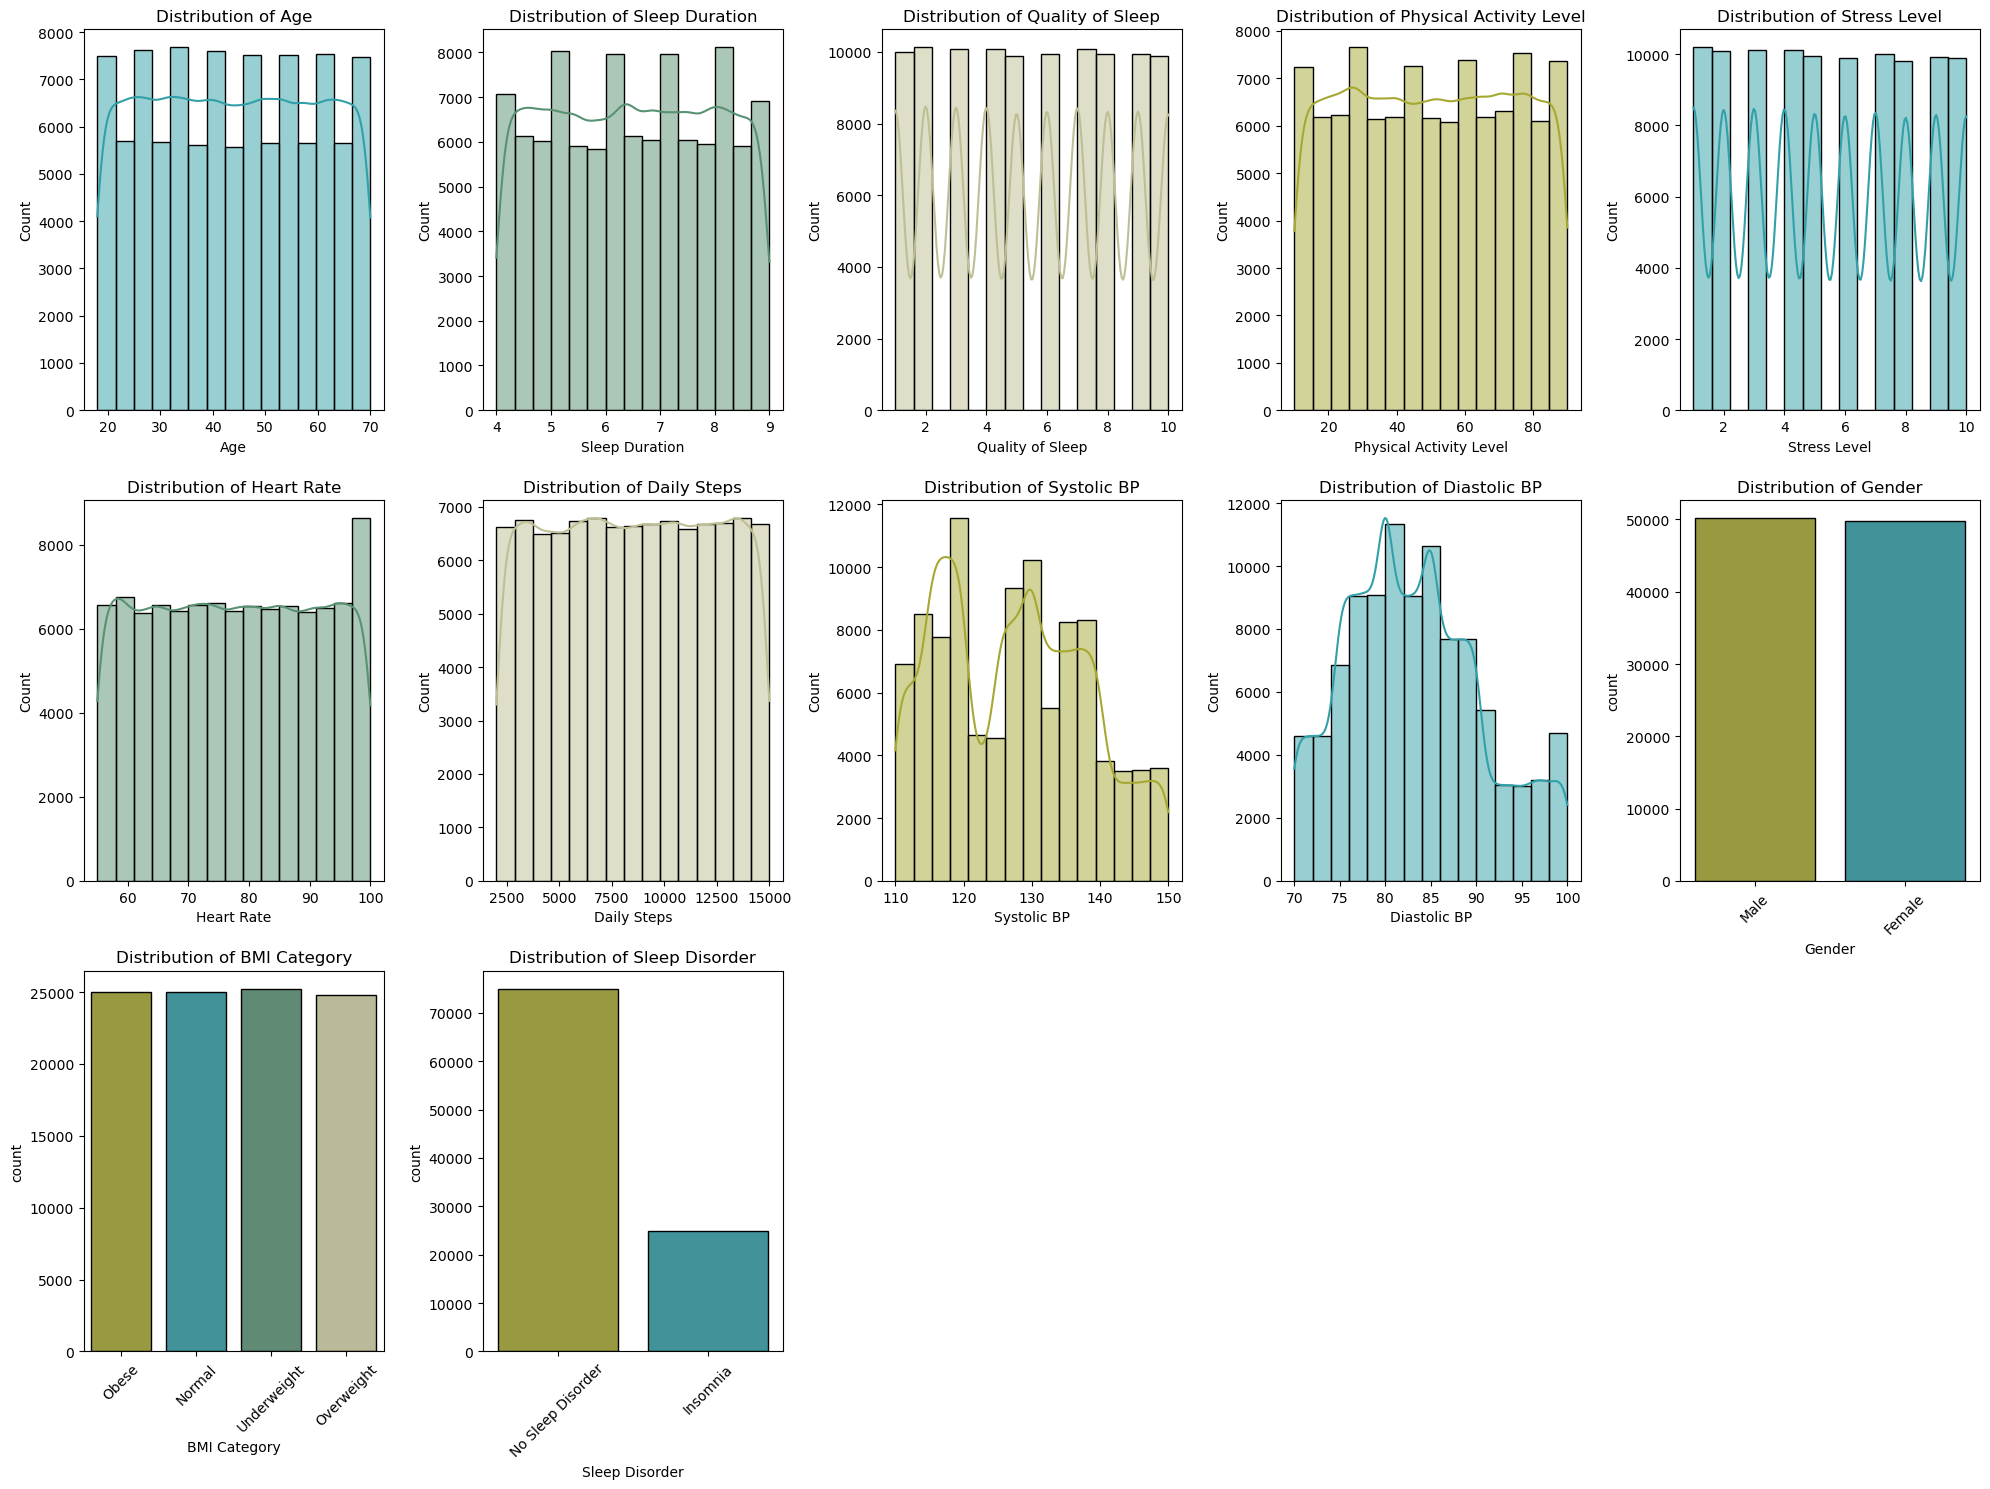

In [311]:

# Define numerical and categorical variables
numerical_vars = [
    'Age', 'Sleep Duration', 'Quality of Sleep', 
    'Physical Activity Level', 'Stress Level', 'Heart Rate', 
    'Daily Steps', 'Systolic BP', 'Diastolic BP'
]
categorical_vars = ['Gender', 'BMI Category', 'Sleep Disorder']

# Set up figure size
plt.figure(figsize=(20, 15))

# Custom color palette
custom_palette = ['#a6a832', '#32a0a8', '#599173', '#bfbf95']

# Loop through numerical variables
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(3, 5, i)  # Adjust grid based on the number of variables
    sns.histplot(sleep_df[var], kde=True, bins=15, color=custom_palette[i % len(custom_palette)], edgecolor='black')
    plt.title(f'Distribution of {var}')

# Loop through categorical variables
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 5, len(numerical_vars) + i)  # Continue subplot indexing
    sns.countplot(x=var, data=sleep_df, palette=custom_palette[0:len(sleep_df[var].unique())], hue=var, edgecolor='black')
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=45)  # Rotate labels for better visibility if needed

plt.tight_layout()
plt.show()


**TO DO**: Describe the distribution in the variables above.

A different way to visualize the similar information for the numeric values is using Boxplots.
Boxplots are useful, since they directly show:
- the maximum
- the minimum
- the average
- the range of the central 50 % of the data
- some potential outliers.

NameError: name 'colors' is not defined

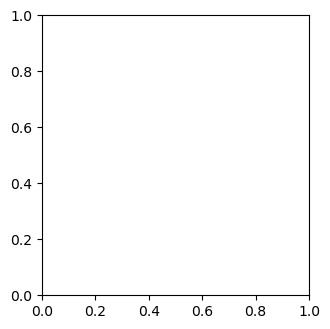

In [344]:
plt.figure(figsize=(20, 8))

for i, var in enumerate(numerical_vars, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(y=sleep_df[var], color=colors[i % len(colors)])  # Cycle colors
    plt.title(f'Boxplot of {var}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Processing 